# **Final Project Task 3 - Census Modeling Regression**

Requirements

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [124]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [125]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age  workclass  fnlwgt     education  education-num  \
31521   33    Private  268451  Some-college             10   
11721   24    Private  204226       Masters             14   
30707   27          ?  146651       HS-grad              9   
26454   28  Local-gov  220754       HS-grad              9   
21611   24    Private  289448     Assoc-voc             11   
7388    59    Private  193895  Some-college             10   
26962   17    Private  108273          10th              6   
11003   28    Private  181291     Bachelors             13   
28881   45    Private  236040  Some-college             10   
15010   20    Private  195411       HS-grad              9   

           marital-status        occupation   relationship  \
31521            Divorced   Exec-managerial      Unmarried   
11721       Never-married    Prof-specialty  Not-in-family   
30707  Married-civ-spouse                 ?      Own-child   
26454           Separated  Transport-moving      Own-child   
21611       Never-married      Adm-clerical      Own-child   
7388              Widowed      Adm-clerical  Not-in-family   
26962       Never-married             Sales      Own-child   
11003       Never-married   Exec-managerial  Not-in-family   
28881  Married-civ-spouse    Prof-specialty        Husband   
15010       Never-married             Sales      Own-child   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
31521               White  Female             0             0              40   
11721               White  Female             0             0              40   
30707               White  Female             0             0              15   
26454               White  Female             0             0              25   
21611  Asian-Pac-Islander  Female             0             0              40   
7388                White  Female             0             0              35   
26962               White  Female             0             0              12   
11003               White  Female             0          1564              50   
28881               White    Male             0             0              40   
15010               Black  Female             0             0              20   

      native-country income  
31521  United-States  <=50K  
11721  United-States  <=50K  
30707  United-States  <=50K  
26454  United-States  <=50K  
21611    Philippines  <=50K  
7388   United-States  <=50K  
26962  United-States  <=50K  
11003  United-States   >50K  
28881  United-States   >50K  
15010  United-States  <=50K

In [ ]:
# 1. Load Data
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Creating a validation set from the training set.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify if the data has been correctly loaded
print(x_train.head())
print(y_train.head())

       education-num  sex  income  age_group  workclass_Local-gov  \
15272      -0.421694    0       0  -1.385307                    0   
15797      -1.978997    1       0  -1.385307                    0   
7072       -1.978997    0       0  -0.653726                    0   
3261       -0.032368    0       0  -1.385307                    0   
23655       0.746284    1       0  -0.653726                    0   

       workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
15272                       0                  0                       0   
15797                       0                  1                       0   
7072                        0                  1                       0   
3261                        0                  1                       0   
23655                       0                  1                       0   

       workclass_Self-emp-not-inc  workclass_State-gov  ...  \
15272                           0                    1  ...   
15

In [ ]:
# Transformation into a 1D array after the train-validation split
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.ravel()
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.values.ravel()

This step of transforming into 1D arrays ensures that y_train and y_val are 1D arrays before being used in model training and evaluation


In [128]:
print(y_train.shape)
print(y_val.shape)

(20823,)
(5206,)


In [ ]:
#  Train the SGDRegressor model
model_sgd = SGDRegressor(random_state=42)
model_sgd.fit(x_train, y_train)

# Validation on the validation set
y_val_pred_sgd = model_sgd.predict(x_val)

# Evaluation on the test set
y_test_pred_sgd = model_sgd.predict(x_test)

# Evaluation metrics for the test set
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)
test_mae_sgd = mean_absolute_error(y_test, y_test_pred_sgd)
test_rmse_sgd = test_mse_sgd ** 0.5
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

# Display results
print(f"Test MSE (SGD Regressor): {test_mse_sgd}")
print(f"Test MAE (SGD Regressor): {test_mae_sgd}")
print(f"Test RMSE (SGD Regressor): {test_rmse_sgd}")
print(f"Test R² (SGD Regressor): {test_r2_sgd}")

Test MSE (SGD Regressor): 133.44925534650807
Test MAE (SGD Regressor): 7.9124059381502025
Test RMSE (SGD Regressor): 11.552023863657315
Test R² (SGD Regressor): 0.12755082867368517


In [ ]:
# Train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Validation on the validation set
y_val_pred_lr = model_lr.predict(x_val)

# Evaluation on the test set
y_test_pred_lr = model_lr.predict(x_test)

# Evaluation metrics for the test set
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_rmse_lr = test_mse_lr ** 0.5
test_r2_lr = r2_score(y_test, y_test_pred_lr)

# Display results
print(f"Test MSE (Linear Regression): {test_mse_lr}")
print(f"Test MAE (Linear Regression): {test_mae_lr}")
print(f"Test RMSE (Linear Regression): {test_rmse_lr}")
print(f"Test R² (Linear Regression): {test_r2_lr}")

Test MSE (Linear Regression): 132.70190430591256
Test MAE (Linear Regression): 7.851803116255622
Test RMSE (Linear Regression): 11.51963125737593
Test R² (Linear Regression): 0.1324367742292777


In [ ]:
#  Train the Decision Tree Regression model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)

#  Validation on the validation set
y_val_pred_dt = model_dt.predict(x_val)

# Evaluation on the test set
y_test_pred_dt = model_dt.predict(x_test)

# Evaluation metrics for the test set
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_rmse_dt = test_mse_dt ** 0.5
test_r2_dt = r2_score(y_test, y_test_pred_dt)

# Display results
print(f"Test MSE (DecisionTreeRegressor): {test_mse_dt}")
print(f"Test MAE (DecisionTreeRegressor): {test_mae_dt}")
print(f"Test RMSE (DecisionTreeRegressor): {test_rmse_dt}")
print(f"Test R² (DecisionTreeRegressor): {test_r2_dt}")

Test MSE (DecisionTreeRegressor): 140.40188205466416
Test MAE (DecisionTreeRegressor): 8.106191320176594
Test RMSE (DecisionTreeRegressor): 11.84913001256481
Test R² (DecisionTreeRegressor): 0.08209674656343457


In [ ]:
# Train the RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_train, y_train)

# Validation on the validation set
y_val_pred_rf = model_rf.predict(x_val)

# Evaluation on the test set
y_test_pred_rf = model_rf.predict(x_test)

# Evaluation metrics for the test set
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = test_mse_rf ** 0.5
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Display results
print(f"Test MSE (RandomForestRegressor): {test_mse_rf}")
print(f"Test MAE (RandomForestRegressor): {test_mae_rf}")
print(f"Test RMSE (RandomForestRegressor): {test_rmse_rf}")
print(f"Test R² (RandomForestRegressor): {test_r2_rf}")

Test MSE (RandomForestRegressor): 129.43537984188094
Test MAE (RandomForestRegressor): 7.893797569265532
Test RMSE (RandomForestRegressor): 11.376967075714026
Test R² (RandomForestRegressor): 0.15379228164190195


In [ ]:
#  Train the Ridge Regression model
model_ridge = Ridge(random_state=42)
model_ridge.fit(x_train, y_train)

# Validation on the validation set
y_val_pred_ridge = model_ridge.predict(x_val)

# Evaluation on the test set
y_test_pred_ridge = model_ridge.predict(x_test)

# Evaluation metrics for the test set
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_rmse_ridge = test_mse_ridge ** 0.5
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Display results
print(f"Test MSE (Ridge Regression): {test_mse_ridge}")
print(f"Test MAE (Ridge Regression): {test_mae_ridge}")
print(f"Test RMSE (Ridge Regression): {test_rmse_ridge}")
print(f"Test R² (Ridge Regression): {test_r2_ridge}")

Test MSE (Ridge Regression): 132.71204188310557
Test MAE (Ridge Regression): 7.852217380960577
Test RMSE (Ridge Regression): 11.520071262067157
Test R² (Ridge Regression): 0.13237049794472056


In [ ]:
# Train the Lasso Regression model
model_lasso = Lasso(random_state=42)
model_lasso.fit(x_train, y_train)

# Validation on the validation set
y_val_pred_lasso = model_lasso.predict(x_val)

# Evaluation on the test set
y_test_pred_lasso = model_lasso.predict(x_test)

# Evaluation metrics for the test set
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
test_rmse_lasso = test_mse_lasso ** 0.5
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Display results
print(f"Test MSE (Lasso Regression): {test_mse_lasso}")
print(f"Test MAE (Lasso Regression): {test_mae_lasso}")
print(f"Test RMSE (Lasso Regression): {test_rmse_lasso}")
print(f"Test R² (Lasso Regression): {test_r2_lasso}")

Test MSE (Lasso Regression): 146.35850651806885
Test MAE (Lasso Regression): 7.5740431858507105
Test RMSE (Lasso Regression): 12.097871983041847
Test R² (Lasso Regression): 0.043154213212419745


In [ ]:
# Comparison of model performance
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge', 'Lasso', 'SGD Regressor'],
    'MSE': [test_mse_lr, test_mse_dt, test_mse_rf, test_mse_ridge, test_mse_lasso, test_mse_sgd],
    'MAE': [test_mae_lr, test_mae_dt, test_mae_rf, test_mae_ridge, test_mae_lasso, test_mae_sgd],
    'RMSE': [test_rmse_lr, test_rmse_dt, test_rmse_rf, test_rmse_ridge, test_rmse_lasso, test_rmse_sgd],
    'R²': [test_r2_lr, test_r2_dt, test_r2_rf, test_r2_ridge, test_r2_lasso, test_r2_sgd]
}

# Creating a DataFrame for comparison
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

               Model         MSE       MAE       RMSE        R²
0  Linear Regression  132.701904  7.851803  11.519631  0.132437
1      Decision Tree  140.401882  8.106191  11.849130  0.082097
2      Random Forest  129.435380  7.893798  11.376967  0.153792
3              Ridge  132.712042  7.852217  11.520071  0.132370
4              Lasso  146.358507  7.574043  12.097872  0.043154
5      SGD Regressor  133.449255  7.912406  11.552024  0.127551


The evaluation results of various regression models, including SGDRegressor, LinearRegression, DecisionTreeRegressor, RandomForestRegressor, RidgeRegression, and LassoRegression, indicate that RandomForestRegressor is the model with the best performance, achieving the lowest values for MSE (129.435380) and RMSE (11.376967), as well as the highest R² (0.153792). DecisionTreeRegressor performed the worst, with the highest values for MAE and MSE and the second-lowest R² (0.082097). The models LinearRegression, SGDRegressor, and RidgeRegression had similar performance, with nearly identical values for all four metrics, while LassoRegression had a slightly weaker performance. These results suggest that RandomForestRegressor is the most suitable model for predicting hours worked per week in this context.

Random Forest is an ensemble of decision trees, and one of its major advantages is that it reduces the risk of overfitting by aggregating the predictions of multiple trees. Each tree is trained on a different subset of data, and by combining their predictions, the model reaches a more robust solution. When the data has many features (explanatory variables), Random Forest is highly effective in selecting the most important features and eliminating the less relevant ones. This is a form of implicit feature selection that helps the model focus on the most relevant information. This behavior reduces the risk of including variables that are not significant for prediction and helps improve performance.

Random Forest is the optimal choice for this dataset due to its ability to reduce overfitting, the stability it provides through the aggregation of multiple decision tree predictions, and its capability to capture complex nonlinear relationships. These characteristics make Random Forest a powerful model for complex regressions with high variability in the data.

In [ ]:
# HYPERPARAMETER TUNING for Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Train the model
grid_search.fit(x_train, y_train)

# The best model from GridSearchCV
best_model_rf = grid_search.best_estimator_

# Predictions on the test set
y_test_pred_best_rf = best_model_rf.predict(x_test)

# Calculating MSE, MAE, RMSE, and R² on the test set
test_mse_best_rf = mean_squared_error(y_test, y_test_pred_best_rf)
test_mae_best_rf = mean_absolute_error(y_test, y_test_pred_best_rf)
test_rmse_best_rf = test_mse_best_rf ** 0.5
test_r2_best_rf = r2_score(y_test, y_test_pred_best_rf)

# Display results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RandomForest MSE: {test_mse_best_rf}")
print(f"Best RandomForest MAE: {test_mae_best_rf}")
print(f"Best RandomForest RMSE: {test_rmse_best_rf}")
print(f"Best RandomForest R²: {test_r2_best_rf}")

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RandomForest MSE: 119.55259903401809
Best RandomForest MAE: 7.434897711228106
Best RandomForest RMSE: 10.934011113677272
Best RandomForest R²: 0.218402787739006


After hyperparameter tuning, the Random Forest model showed a significant improvement across all metrics (MSE, MAE, RMSE, and R²). In particular, MSE and RMSE decreased significantly, while R² increased, suggesting that the model explains more of the variability in the data and makes more accurate predictions.
This is a clear improvement in performance and confirms that hyperparameter optimization had a positive impact on the model.


                                 Feature  Importance
3                              age_group    0.364905
1                                    sex    0.139914
0                          education-num    0.120080
2                                 income    0.109100
14          marital-status_Never-married    0.060293
12     marital-status_Married-civ-spouse    0.058729
7                 workclass_Self-emp-inc    0.034707
16                marital-status_Widowed    0.026371
8             workclass_Self-emp-not-inc    0.022260
6                      workclass_Private    0.016866
9                    workclass_State-gov    0.010387
20                            race_White    0.008005
18                            race_Black    0.006601
4                    workclass_Local-gov    0.006311
17               race_Asian-Pac-Islander    0.005266
15              marital-status_Separated    0.004145
13  marital-status_Married-spouse-absent    0.002380
19                            race_Other    0.

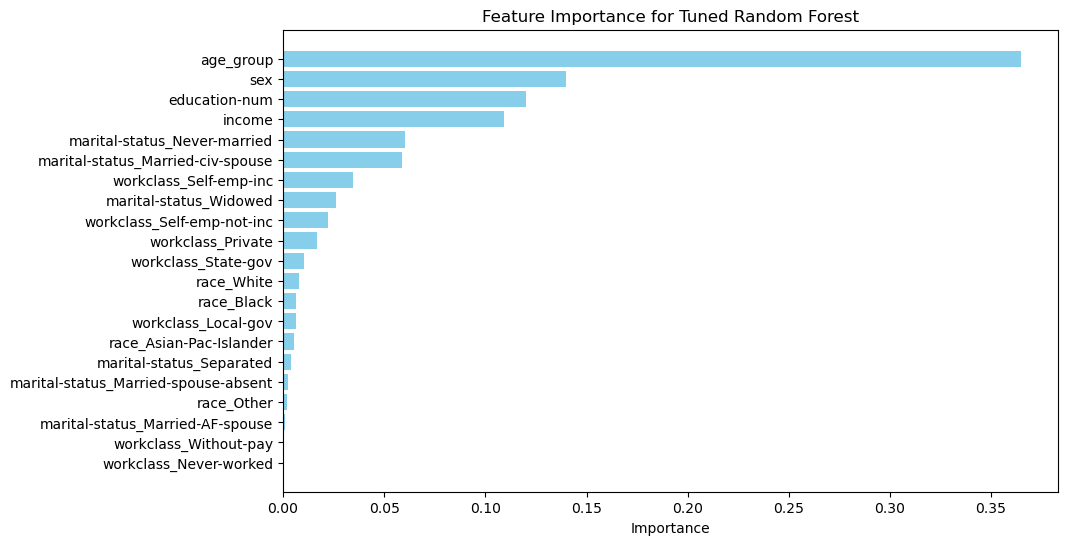

In [ ]:
# Obtain feature importances for Random Forest model
feature_importances = best_model_rf.feature_importances_

# Create a DataFrame to visualize the feature importances.
feature_names = x_train.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by their importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Graphical visualization of the feature importances.
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Tuned Random Forest')
plt.gca().invert_yaxis() 
plt.show()

The chart presents the feature importances for a Tuned RandomForestRegressor model predicting "hours-per-week". On the Y-axis, the features are listed, while on the X-axis, the corresponding importance values for each feature are displayed. The most important features are "age_group", "sex", and "education-num", suggesting that they have the greatest impact on the model's predictions. Other features, such as "income", "marital-status never married", and "marital-status married civ spouse", have a lower importance but still contribute to the model's performance. This chart provides insight into the factors that most influence the number of hours worked per week.

In [141]:
# Defining the Ridge model
model_ridge = Ridge(random_state=42)

# Defining the hyperparameter grid for alpha
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# GridSearchCV for hyperparameter optimization
grid_search_ridge = GridSearchCV(
    estimator=model_ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Training the model
grid_search_ridge.fit(x_train, y_train)

# The best model from GridSearchCV
best_model_ridge = grid_search_ridge.best_estimator_

# Predictions on the test set
y_test_pred_best_ridge = best_model_ridge.predict(x_test)

# Calculating MSE, MAE, RMSE, and R² on the test set
test_mse_best_ridge = mean_squared_error(y_test, y_test_pred_best_ridge)
test_mae_best_ridge = mean_absolute_error(y_test, y_test_pred_best_ridge)
test_rmse_best_ridge = test_mse_best_ridge ** 0.5
test_r2_best_ridge = r2_score(y_test, y_test_pred_best_ridge)

# Display results
print(f"Best parameters (Ridge): {grid_search_ridge.best_params_}")
print(f"Best Ridge MSE: {test_mse_best_ridge}")
print(f"Best Ridge MAE: {test_mae_best_ridge}")
print(f"Best Ridge RMSE: {test_rmse_best_ridge}")
print(f"Best Ridge R²: {test_r2_best_ridge}")

Best parameters (Ridge): {'alpha': 10}
Best Ridge MSE: 132.76016201114192
Best Ridge MAE: 7.85323845260115
Best Ridge RMSE: 11.522159607085033
Best Ridge R²: 0.13205590371397402


The results obtained after tuning for Ridge were the same as before tuning, which means that the hyperparameter optimization did not bring improvements in the case of this model.

In [144]:
# Compile metrics from all models into a DataFrame for comparison
model_results = {
    "Model": ['Linear Regression', 'SGD', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest'],
    "MSE": [test_mse_lr, test_mse_sgd, test_mse_lasso, test_mse_ridge, test_mse_dt, test_mse_best_rf],
    "MAE": [test_mae_lr, test_mae_sgd, test_mae_lasso, test_mae_ridge, test_mae_dt, test_mae_best_rf],
    "RMSE": [test_rmse_lr, test_rmse_sgd, test_rmse_lasso, test_rmse_ridge, test_rmse_dt, test_rmse_best_rf],
    "R²": [test_r2_lr, test_r2_sgd, test_r2_lasso, test_r2_ridge, test_r2_dt, test_r2_best_rf]
}

# Create a DataFrame with these data.
comparison_df = pd.DataFrame(model_results)

# Display the table
print("Model Comparison: Metrics Overview")
print(comparison_df)

Model Comparison: Metrics Overview
               Model         MSE       MAE       RMSE        R²
0  Linear Regression  132.701904  7.851803  11.519631  0.132437
1                SGD  133.449255  7.912406  11.552024  0.127551
2              Lasso  146.358507  7.574043  12.097872  0.043154
3              Ridge  132.712042  7.852217  11.520071  0.132370
4      Decision Tree  140.401882  8.106191  11.849130  0.082097
5      Random Forest  119.552599  7.434898  10.934011  0.218403


The Random Forest model performed better in all metrics (MSE, MAE, RMSE, and R²) compared to Ridge. This suggests that Random Forest is more efficient in capturing the complex relationships between variables and predicting the target variable in this case.

Although Random Forest appears to be more performant, it should be noted that it is a more complex model, based on decision trees, and harder to interpret compared to Ridge, which is a simpler linear model.

The priority is prediction accuracy - then Random Forest is the better choice, given its superior performance across all metrics.